# Importing libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # importing the k-means algorithm from scikit-learn
from sklearn.preprocessing import StandardScaler # importing StandardScaler to standardize features
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib
from sklearn. decomposition import PCA

In [2]:
# ensuring that the graphs  are displayed within the notebook without "calling" them specifically.

%matplotlib inline

In [3]:
# turning a project folder path into a string

path = r'/Users/mart/Documents/09-2022 IBRD  Statement of Loans'

# Importing database

df = pd.read_pickle(os.path.join(path,'02 Data','Prepared Data', 'SoL.pkl'))

# set options to show all columns

pd.set_option('display.max_columns', None)

# check the first rows

df.head()


,Loan Number,Region,Country,Borrower,Guarantor,Loan Type,Loan Status,Interest Rate,Original Principal Amount,Cancelled Amount,Undisbursed Amount,Disbursed Amount,Repaid to IBRD,Due to IBRD,Exchange Adjustment,Borrowers Obligation,Loans Held,Agreement Signing Date,Effective Date (Most Recent),Closed Date (Most Recent)
0,IBRD00010,EUROPE AND CENTRAL ASIA,France,CREDIT NATIONAL,France,NPL,Fully Repaid,4.25,250000000.0,0.0,0.0,250000000.0,38000.00,0.0,0.0,0.0,0.0,1947-05-09,1947-06-09,1947-12-31
5,IBRD00050,LATIN AMERICA AND CARIBBEAN,Chile,Ministry of Finance,Chile,NPL,Fully Repaid,4.50,13500000.0,0.0,0.0,13500000.0,12167000.00,0.0,0.0,0.0,0.0,1948-03-25,1949-04-07,1954-12-31
6,IBRD00060,LATIN AMERICA AND CARIBBEAN,Chile,Ministry of Finance,Chile,NPL,Fully Repaid,3.75,2500000.0,0.0,0.0,2500000.0,755000.00,0.0,0.0,0.0,0.0,1948-03-25,1949-04-07,1950-01-01
13,IBRD00111,LATIN AMERICA AND CARIBBEAN,Brazil,Ministério da Fazenda,Brazil,NPL,Fully Repaid,4.50,75000000.0,0.0,0.0,75000000.0,70971588.97,0.0,0.0,0.0,0.0,1949-01-27,1949-05-09,1953-12-31
14,IBRD00112,LATIN AMERICA AND CARIBBEAN,Brazil,Ministério da Fazenda,Brazil,NPL,Fully Repaid,4.25,15000000.0,0.0,0.0,15000000.0,15000000.00,0.0,0.0,0.0,0.0,1951-01-18,1951-04-10,1954-12-31


In [4]:
df.shape

(8391, 20)

In [5]:
df.columns

Index(['Loan Number', 'Region', 'Country', 'Borrower', 'Guarantor',
       'Loan Type', 'Loan Status', 'Interest Rate',
       'Original Principal Amount', 'Cancelled Amount', 'Undisbursed Amount',
       'Disbursed Amount', 'Repaid to IBRD', 'Due to IBRD',
       'Exchange Adjustment', 'Borrowers Obligation', 'Loans Held',
       'Agreement Signing Date', 'Effective Date (Most Recent)',
       'Closed Date (Most Recent)'],
      dtype='object')

In [6]:
# removing categorical and date variables

df_num = df[df.columns[7:-3]]

In [7]:
df_num.head()

,Interest Rate,Original Principal Amount,Cancelled Amount,Undisbursed Amount,Disbursed Amount,Repaid to IBRD,Due to IBRD,Exchange Adjustment,Borrowers Obligation,Loans Held
0,4.25,250000000.0,0.0,0.0,250000000.0,38000.00,0.0,0.0,0.0,0.0
5,4.50,13500000.0,0.0,0.0,13500000.0,12167000.00,0.0,0.0,0.0,0.0
6,3.75,2500000.0,0.0,0.0,2500000.0,755000.00,0.0,0.0,0.0,0.0
13,4.50,75000000.0,0.0,0.0,75000000.0,70971588.97,0.0,0.0,0.0,0.0
14,4.25,15000000.0,0.0,0.0,15000000.0,15000000.00,0.0,0.0,0.0,0.0


In [8]:
# removing scientific notation

pd.options.display.float_format = '{:.2f}'.format

df_num.describe()

,Interest Rate,Original Principal Amount,Cancelled Amount,Undisbursed Amount,Disbursed Amount,Repaid to IBRD,Due to IBRD,Exchange Adjustment,Borrowers Obligation,Loans Held
count,8391.00,8391.00,8391.00,8391.00,8391.00,8391.00,8391.00,8391.00,8391.00,8391.00
mean,4.08,94807155.65,10272155.46,6739175.65,76188309.73,47615715.81,28365462.57,-1020931.31,27344531.26,35104638.22
std,3.44,164405464.87,43929656.64,37261488.79,150230586.39,98871364.56,110273230.20,15917229.45,103733969.14,118617819.45
min,0.00,0.00,0.00,-0.01,0.00,0.00,-148309024.60,-825260450.51,-0.03,-148309024.60
25%,0.00,14900000.00,0.00,0.00,8201562.33,3723900.00,0.00,0.00,0.00,0.00
50%,4.85,40000000.00,262.27,0.00,26949380.65,17487294.41,0.00,0.00,0.00,0.00
75%,7.25,100000000.00,3967965.42,0.00,80292379.62,50294831.76,0.00,0.00,0.00,0.00
max,11.60,3750000000.00,1995000000.00,696047832.19,3153530829.10,3000000000.00,2534063201.88,231802879.66,1708802751.37,2534063201.88


# Standardization

In [9]:
# using standardscaler to standarise the data such that the mean becomes zero and the standard deviation becomes 1

scaler = StandardScaler()

In [10]:
# standardizing data

df_num = scaler.fit_transform(df_num)
df_num

array([[ 0.05072805,  0.94402028, -0.23384584, ...,  0.06414384,
        -0.26361819, -0.29596506],
       [ 0.12336684, -0.49458211, -0.23384584, ...,  0.06414384,
        -0.26361819, -0.29596506],
       [-0.09454954, -0.56149384, -0.23384584, ...,  0.06414384,
        -0.26361819, -0.29596506],
       ...,
       [ 1.21294876, -0.27255679, -0.23148016, ...,  0.06414384,
        -0.26361819, -0.29596506],
       [ 1.21294876, -0.54628663, -0.15090961, ...,  0.06414384,
        -0.26361819, -0.29596506],
       [ 1.50350394, -0.5158722 , -0.23384584, ...,  0.06414384,
        -0.26361819, -0.29596506]])

In [11]:
# employing PCA to reduce the number of features in our data set

pca = PCA()

# fitting our standardized data using PCA

pca.fit(df_num)

PCA()

In [12]:
# the attribute shows how much variance is explained by each of the seven individual components

pca.explained_variance_ratio_

array([4.76901431e-01, 1.56172609e-01, 1.15196533e-01, 9.98527393e-02,
       7.92170794e-02, 7.20302638e-02, 5.85926035e-04, 4.34182418e-05,
       2.34652173e-32, 4.15238985e-33])

Text(0, 0.5, 'Cumulative Explained Variance')

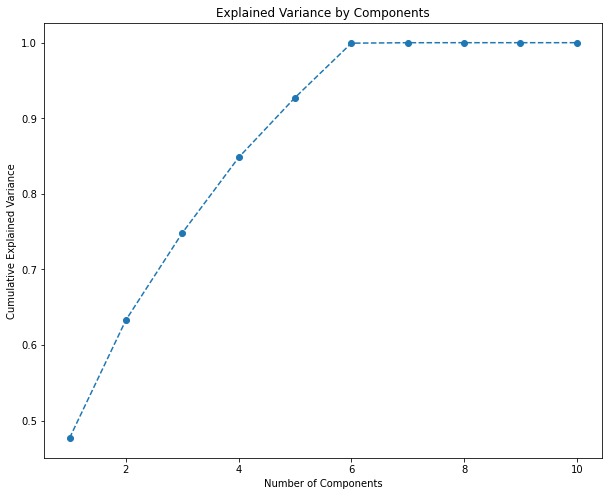

In [13]:
# plotting explained variance by components

plt.figure (figsize = (10,8))
plt.plot(range(1,11), pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle='--')
plt.title('Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')

The graph shows the amount of variance captured (on the y-axis) depending on the number of components included (the x-axis). A rule of thumb is to preserve around 80 % of the variance. 
- I decided to keep 4 components.

In [14]:
# choosing four components

pca = PCA(n_components = 4)

In [15]:
# fitting the model the our data with the selected number of components

pca.fit(df_num)

PCA(n_components=4)

In [16]:
pca.transform(df_num)

array([[ 0.39666286,  0.48623158,  0.08712007, -0.20107445],
       [-0.84864571, -0.30231394,  0.22391829, -0.03840877],
       [-0.88453053, -0.45308928,  0.14068629,  0.00509851],
       ...,
       [-0.79734161,  0.24496451,  0.67284488, -0.18249797],
       [-1.11486155, -0.25834437,  0.73502441,  0.07166419],
       [-1.12450939, -0.15142555,  0.88055962, -0.03816168]])

In [17]:
# obtaining PCA scores

scores_pca = pca.transform(df_num)

##   Combining PCA and k-means

In [18]:
# fitting K means using the transformed data from the PCA

wcss = []
for i in range(1,10) :
    kmeans_pca = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans_pca.fit(scores_pca)
    wcss.append(kmeans_pca.inertia_)

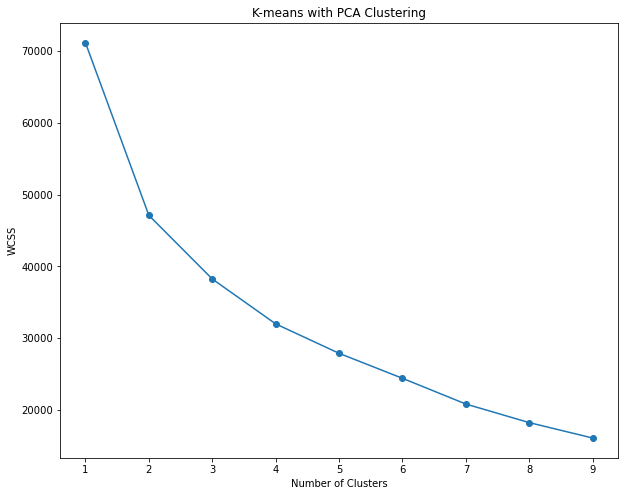

In [19]:
# plotting k-means with PCA clustering

plt.figure(figsize = (10,8))
plt.plot(range(1, 10), wcss, marker = 'o', linestyle= '-')
plt.xlabel ('Number of Clusters')
plt.ylabel('WCSS')
plt.title('K-means with PCA Clustering')
plt.show()

- The curve straightens out after two on the x-axis. 
- This means that the optimal count for clusters is 2.

## k-means clustering

In [20]:
# creating the k-means object.

kmeans_pca = KMeans(n_clusters = 2, init = 'k-means++', random_state = 42)

In [21]:
# fitting the data with the k-means pca model

kmeans_pca.fit(df_num)

KMeans(n_clusters=2, random_state=42)

In [22]:
# converting data from array to df

df_stand = pd.DataFrame(df_num, columns = ['Interest Rate','Original Principal Amount', 
                'Cancelled Amount', 'Undisbursed Amount','Disbursed Amount', 
                'Repaid to IBRD', 'Due to IBRD', 'Exchange Adjustment', 
                'Borrowers Obligation', 'Loans Held']) 


In [23]:
df_stand.head()

,Interest Rate,Original Principal Amount,Cancelled Amount,Undisbursed Amount,Disbursed Amount,Repaid to IBRD,Due to IBRD,Exchange Adjustment,Borrowers Obligation,Loans Held
0,0.05,0.94,-0.23,-0.18,1.16,-0.48,-0.26,0.06,-0.26,-0.30
1,0.12,-0.49,-0.23,-0.18,-0.42,-0.36,-0.26,0.06,-0.26,-0.30
2,-0.09,-0.56,-0.23,-0.18,-0.49,-0.47,-0.26,0.06,-0.26,-0.30
3,0.12,-0.12,-0.23,-0.18,-0.01,0.24,-0.26,0.06,-0.26,-0.30
4,0.05,-0.49,-0.23,-0.18,-0.41,-0.33,-0.26,0.06,-0.26,-0.30


In [24]:
# adding "clusters" column

df_stand['clusters'] = kmeans_pca.fit_predict(df_stand)

In [25]:
df_stand.head()

,Interest Rate,Original Principal Amount,Cancelled Amount,Undisbursed Amount,Disbursed Amount,Repaid to IBRD,Due to IBRD,Exchange Adjustment,Borrowers Obligation,Loans Held,clusters
0,0.05,0.94,-0.23,-0.18,1.16,-0.48,-0.26,0.06,-0.26,-0.30,1
1,0.12,-0.49,-0.23,-0.18,-0.42,-0.36,-0.26,0.06,-0.26,-0.30,1
2,-0.09,-0.56,-0.23,-0.18,-0.49,-0.47,-0.26,0.06,-0.26,-0.30,1
3,0.12,-0.12,-0.23,-0.18,-0.01,0.24,-0.26,0.06,-0.26,-0.30,1
4,0.05,-0.49,-0.23,-0.18,-0.41,-0.33,-0.26,0.06,-0.26,-0.30,1


In [26]:
# counting values in clusters

df_stand['clusters'].value_counts()

1    8082
0     309
Name: clusters, dtype: int64

# Visualizations with clustered data

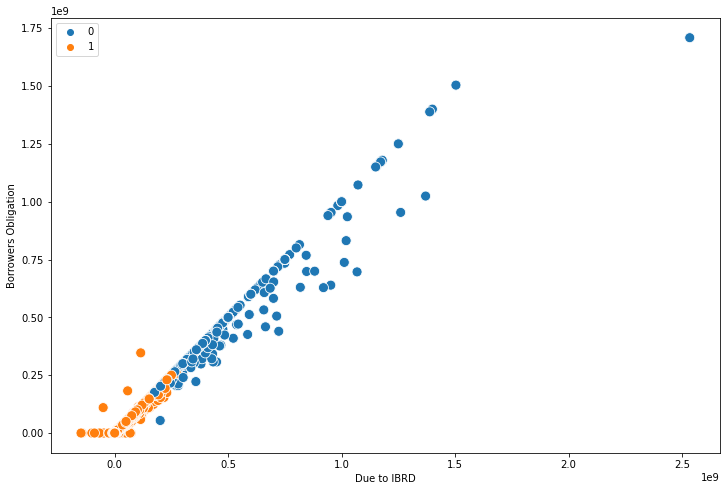

In [27]:
# Plot the clusters for the "Borrowers Obligation" and "Due to IBRD" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Due to IBRD'], y=df['Borrowers Obligation'], hue=kmeans_pca.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm
# `s` represents the size of the points you want to see in the plot

ax.grid(False) # This removes the grid from the background
plt.xlabel('Due to IBRD') # Label x-axis
plt.ylabel('Borrowers Obligation') # Label y-axis
plt.show()

- The first cluster, in orange (coded as “1” in the legend), has only data points that are representing really low amounts for both, Due to IBRD and Borrowers Obligation.

- The second cluster, in blue (coded as “0” in the legend), gathers the data points with the highest amount of Due to IBRD and highest amounts of Borrowers Obligations. There is only one data point that is suggesting a low amount of Borrowers Obligation.


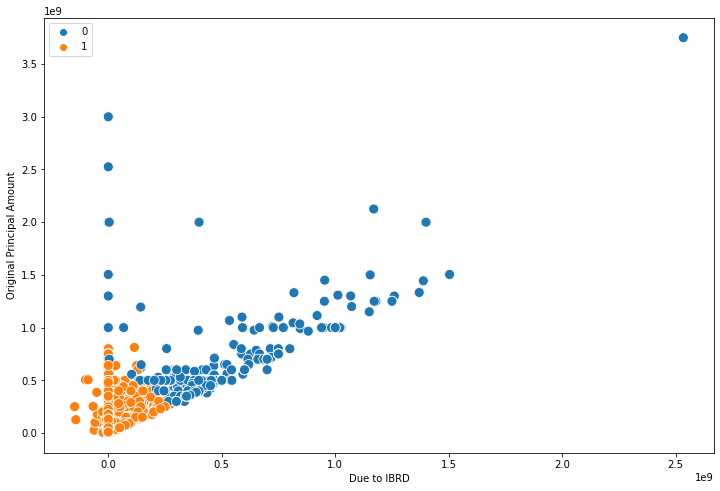

In [28]:
# Plot the clusters for the "Original Principal Amount" and "Due to IBRD" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Due to IBRD'], y=df['Original Principal Amount'], hue=kmeans_pca.labels_, s=100) 

ax.grid(False) 
plt.xlabel('Due to IBRD')
plt.ylabel('Original Principal Amount')
plt.show()

- The first cluster, in orange (coded as “1” in the legend), contains data points with low amounts of Original Principal Amount and Due to IBRD.

- The second cluster, in blue (coded as “0” in the legend), gathers the data points with the high Original Principal Amounts and mostly high amounts of Due to IBRD, with exception of data points that are representing zero amounts of Due to IBRD.

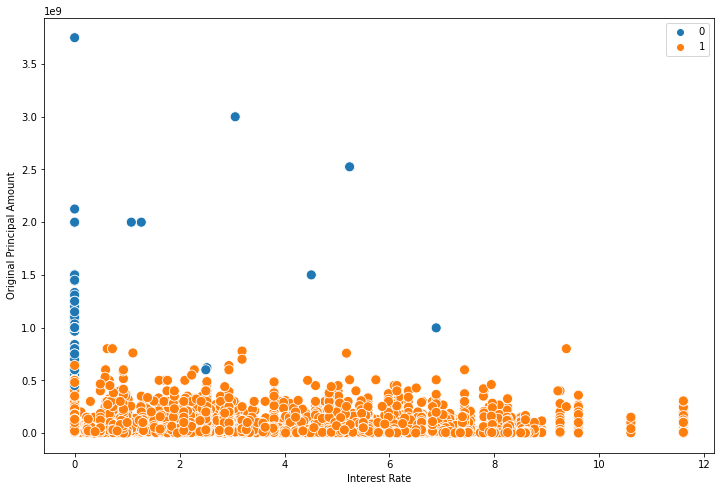

In [29]:
# Plot the clusters for the "Interest Rate" and "Original Principal Amount" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Interest Rate'], y=df['Original Principal Amount'], hue=kmeans_pca.labels_, s=100) 

ax.grid(False) 
plt.xlabel('Interest Rate')
plt.ylabel('Original Principal Amount')
plt.show()

- The first cluster, in orange (coded as “1” in the legend), is the most populated cluster. It gathers the data points with very low Original Principal Amounts and all hights of Interest rates. 

- The second cluster, in blue (coded as “0” in the legend), includes points with only high Original Principal Amounts, and with only relatively small Interest Rates. There are no blue points where Interest Rate is higher than 7.


In [30]:
df_stand.loc[df_stand['clusters'] == 1, 'cluster'] = 'orange'
df_stand.loc[df_stand['clusters'] == 0, 'cluster'] = 'blue'

In [31]:
# calculating the descriptive statistics for clusters using the groupby() function

df_stand.groupby('cluster').agg({'Interest Rate':['mean', 'median'],
                             'Original Principal Amount':['mean', 'median'],
                             'Due to IBRD':['mean', 'median'],
                             'Borrowers Obligation':['mean', 'median']})

Interest Rate        Original Principal Amount        Due to IBRD  \
                 mean median                      mean median        mean   
cluster                                                                     
blue            -1.16  -1.18                      3.36   2.46        4.06   
orange           0.04   0.27                     -0.13  -0.35       -0.16   

               Borrowers Obligation         
        median                 mean median  
cluster                                     
blue      3.37                 4.10   3.56  
orange   -0.26                -0.16  -0.26

- The blue cluster has significantly higher means in all categories.

- The orange cluster has a higher mean than the blue one for the Interest Rate category.

- The blue cluster has a lower median number of interest rates than the orange cluster, whereas the blue cluster has a greater median number of original principal amounts than the orange cluster. 

- This implies that the borrower will likely pay a lower interest rate if he obtains a higher original principal amount.


# Future steps

- The cluster analysis revealed that the height of the OPA affects the interest rate, although it is still unclear how exactly, it should be more investigated.

- It would be interesting to examine whether time has any effect on OPA and Interest rates. 

- Additionally, it would be useful to be able to forecast interest rates using a classification system.

# EXPORTING TO EXCEL

In [33]:
df_stand.to_excel('clust_data.xlsx', sheet_name='sheet1', index=False)